ydata = [[12.823, 10.85478], [9.447, 9.529446], [7.042, 8.609713], [5.352, 7.790826], [4.182, 7.306428], [3.344, 6.665404], [2.773, 6.195496], [2.258, 5.902143], [1.862, 5.638786]]
ENDING:     avg w1-w5,acostmean: 0.017241933001467532 2.810995361328941 0.0765919678895483
MINUMUM:    min w1-w5,acostmean: 0.01128703788824351 2.9844878713463134 0.027612505104738155
TIME AVG:  timeavg w1-w5,acostmean: 0.01620579853864789 2.813684879766387 0.048902906006113515
superheat (K), qppdata, qpppred, percentdif:
10.85478 12.823 13.291734481158409 3.655419801594078
9.529446 9.447 9.214213869224386 -2.4641275619309138
8.609713 7.042 6.925225707708477 -1.6582546477069429
7.790826 5.352 5.227637475053324 -2.3236645169408816
7.306428 4.182 4.363796015117628 4.347107009029829
6.665404 3.344 3.3702222369891377 0.784157804699098
6.195496 2.773 2.743613481458732 -1.0597374158409043
5.902143 2.258 2.3935849658043145 6.00464861843731
5.638786 1.862 2.1050869373790606 13.05515238340819
meanAbspdifA =  3.928029

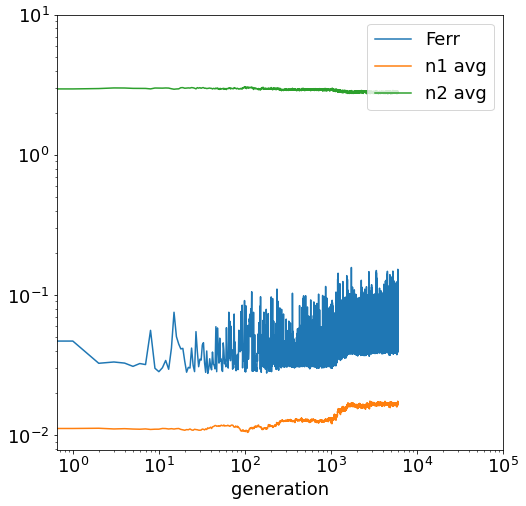

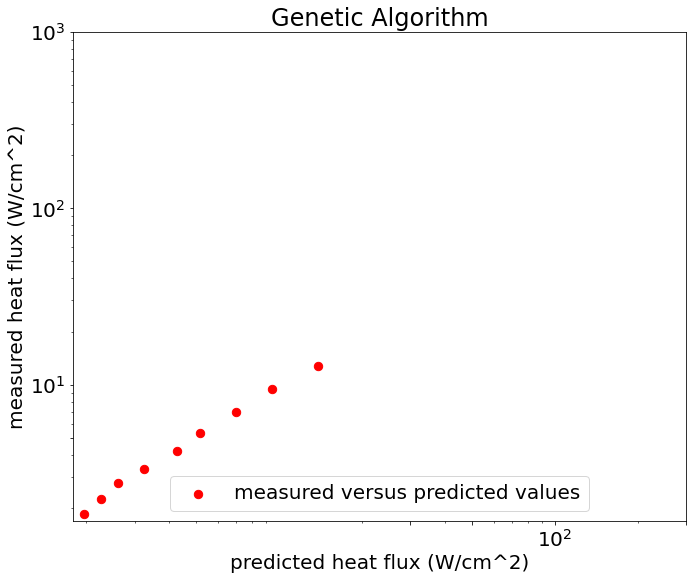

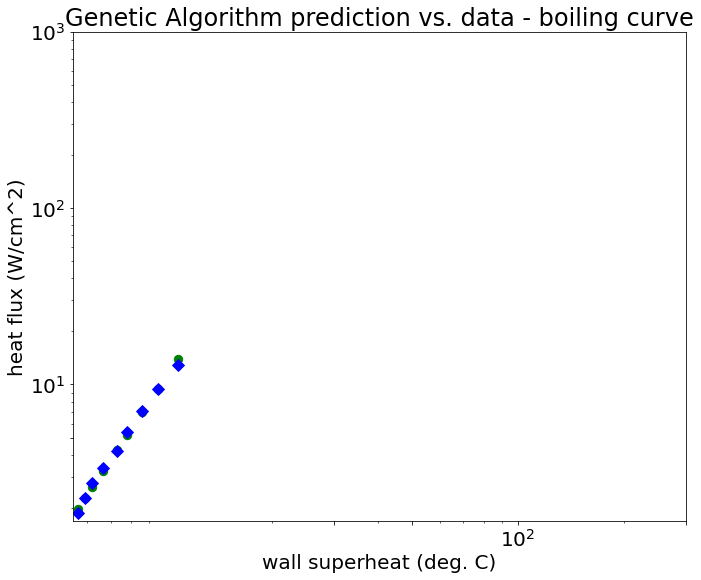

In [1]:
###### >>>>> ProtoGeneticSImBcurve_toUrsan -  LOW SUPERHEAT
#V.P. Carey 9/15/20

#import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)

#INITIALIZE VARIABLES
ydata = []
lydata = []
w = []
wtemp = []
gen=[0]
w1avg = [0.0]
w2avg = [0.0]


meanAcost=[0.0]
acostmeanavgw=[0.0] 
ND = 9       #number of data vectors in array
DI = 2        #number of data items in vector
NS = 9       #total number of DNA strands
NGEN = 6000      #number of generations (steps)
MFRAC = 0.6
#here the number of data vectors equal the number if DNA strands (organisms)
# they can be different if they are randomly paired to compute cost (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array
    meanAcost.append(0.0)
    acostmeanavgw.append(0.0)
    w1avg.append(0.0)
    w2avg.append(0.0)


#Set constants in postulated fit relation
m1=4.0
m2=13.0

# DNA paramters initial guesses
w0i =  -1.0 
w1i =  .011
w2i =  2.9
#0.0521739064589 2.0489977187

# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
# this is an array that is a list of lists

#assembling data array
#store array where rows are data vectors [heat flux, superheat] for one surface
ydata =  [[12.823, 10.85478], [9.447, 9.529446]]
 
ydata.append([7.042, 8.609713])
ydata.append([5.352, 7.790826])
ydata.append([4.182, 7.306428])
ydata.append([3.344, 6.665404])   
ydata.append([2.773, 6.195496])  
ydata.append([2.258, 5.902143])
ydata.append([1.862, 5.638786]) #9

#print data to confirm
print ('ydata =', ydata)

#initialize lydata to have same margtic form as roriginal data above
#need deepcopy since this array is a list(rows) of lists (column entries)
lydata = deepcopy(ydata)

#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)


#OK now have stored array of log values for data
#Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

#store array where rows are dna vectors 
w =  [[-1., w1i+0.001*random(), w2i+0.1*random()]]
for i in range(ND):
    w.append([-1., w1i+0.0001*random(), w2i+0.001*random()])

# store also in wtemp
wtemp = deepcopy(w)

#initialize cost values
cost =  [[0.0]]
costavgw =  [[0.0]]
acost =  [[0.0]]
acostavgw =  [[0.0]]
vcost =  [[0.0]]
avcost =  [[0.0]]

for i in range(ND-1):
    cost.append([0.0])
    acost.append([0.0])
    costavgw.append([0.0])
    acostavgw.append([0.0])
    vcost.append([0.0])
    avcost.append([0.0])

acostmeanavgwMin=1000000000.0 
w1min = 0.0
w2min = 0.0
w3min = 0.0
w4min = 0.0
w5min = 0.0

acostta = 0.0
w1ta = 0.0
w2ta = 0.0
w3ta = 0.0
w4ta = 0.0
w5ta = 0.0

trat = 0.0

#start of evolution loop, number of generations = NGEN
# ----------------------
for k in range(NGEN):
    
    #calculate costs
    for i in range(ND):
        cost[i] = w[i][0]*lydata[i][0] + math.log(w[i][1]) + w[i][2]*lydata[i][1]                               
        acost[i] = abs(cost[i])/abs(lydata[i][0])
    #-------------
    acostmean = numpy.mean(acost)
    acostmedian = numpy.median(acost)

#pick survivors 
    clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
    nkeep = 0
    
    for j in range(NS):  # NS cost values, one for each strand
        #print('acost,clim=', acost[j],clim)
        if (acost[j] < clim):
            nkeep = nkeep + 1
            #wtemp[nkeep][0] = w[j][0];
            wtemp[nkeep-1][1] = w[j][1];
            wtemp[nkeep-1][2] = w[j][2];
      
    # uncomment to print number kept this generation
    #print('nkeep=', nkeep)
    
    #now have survivors in leading entries in list of vectors from 1 to nkeep
    
    #compute number to be added by mating
    nnew = NS - nkeep  
    for j in range(nnew): 
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)
        
        #then randomly pick DNA from parents for offspring
        
        # here, do not change property 0, it's just the -1 multiplier
        #if (numpy.random.rand() < 0.5)
        #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
        #else
        #    wtemp[nkeep+j+1][0] = w[nmate2][0]
      
        if (numpy.random.rand() < 0.5):
            wtemp[nkeep+j+1][1] = w[nmate1][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 1, mutation added
        else:
            wtemp[nkeep+j+1][1] = w[nmate2][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))
    
        if (numpy.random.rand() < 0.5):
            wtemp[nkeep+j+1][2] = w[nmate1][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 2, mutation added
        else:
            wtemp[nkeep+j+1][2] = w[nmate2][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))
    
    
    # set w = wtemp
    w = deepcopy(wtemp)
    

    w1avg[k] = 0.0;
    w2avg[k] = 0.0;
    

    for j in range(NS):  # NS cost values, one for each strand    
        w1avg[k] = w1avg[k] + w[j][1]/NS; 
        w2avg[k] = w2avg[k] + w[j][2]/NS; 
        
    
    #gen[k]=k
    meanAcost[k]=acostmean
 
    #calculate costs for averaged DNA values
    for i in range(ND):  
        
        costavgw[i] = - 1.*lydata[i][0] + math.log(w1avg[k]) + w2avg[k]*lydata[i][1]
        
        acostavgw[i] = abs(costavgw[i])/abs(lydata[i][0])

    #-------------
    
    acostmeanavgw[k] = numpy.mean(acostavgw)

    if (acostmeanavgw[k] < acostmeanavgwMin):
        acostmeanavgwMin = acostmeanavgw[k] 
        w1min = w1avg[k]
        w2min = w2avg[k]
      
    acostta = acostta + acostmeanavgw[k]/NGEN
    if (k > 800):
        w1ta = w1ta + w1avg[k]/(NGEN-800)
        w2ta = w2ta + w2avg[k]/(NGEN-800)
      
    #print('avg w1-w5:', w1avg[k], w2avg[k], acostmeanavgw[k])
    kvalue = k
    
    #end of evolution loop
    # ----------------------
    # ----------------------
    
#final print and plot of results
print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], acostmeanavgw[k])
print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, acostmeanavgwMin)
print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, acostta)

#initialize values
qpppredA =  [[0.0]]
qpppredM =  [[0.0]]
qppdataA =  [[0.0]]
pdifA = [[0.0]]
shData = [[0.0]]
for i in range(0,8):
    qpppredA.append([0.0])
    qppdataA.append([0.0])
    qpppredM.append([0.0])
    pdifA.append([0.0]) 
    shData.append([0.0])

#calculate predicted and data values to print and plot
print('superheat (K), qppdata, qpppred, percentdif:')
meanAbspdifA = 0.0
for i in range(0,9):
    qpppredA[i] = w1ta*(ydata[i][1]**w2ta)
    qpppredM[i] = w1min*(ydata[i][1]**w2min)
    qppdataA[i] = ydata[i][0]
    shData[i] = ydata[i][1]
    pdifA[i] = 100.*(qpppredA[i]-qppdataA[i])/qppdataA[i]
    print(ydata[i][1],ydata[i][0], qpppredA[i], pdifA[i])
    meanAbspdifA = meanAbspdifA + abs(pdifA[i]/9.)
print ('meanAbspdifA = ', meanAbspdifA)



# x axis values are generation number 
# corresponding y axis values are meanCost and DNA constants
# plotting the points  
plt.rcParams.update({'font.size': 18})
#plt.plot(gen, meanAcost) 
plt.plot(gen, acostmeanavgw)
plt.plot(gen, w1avg)
plt.plot(gen, w2avg)

#plt.rcParams.update({'font.size': 12})
plt.legend(['Ferr', 'n1 avg', 'n2 avg'], loc='upper right')
# naming the x axis 
plt.xlabel('generation') 
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000,100000])
  
# uncomment next line to give a title to the graph 
#plt.title('solution evolution') 
# function to show the plot 
plt.show()   #TO HERE ***********************
    
#plot of measured vs. predicted heat flux values for minimum cost achieved
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(11,9))
plt.scatter(qpppredM, qppdataA, s=70, color='red')

plt.legend(['measured versus predicted values'], loc='lower center')
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2)')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.yticks([5.,10.,100.,1000.])
plt.xticks([30.,50.,100.,300.])
plt.show()

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(11,9))
#plt.scatter(shData, qpppredA, s=70, color='red')
plt.scatter(shData, qpppredM, s=70, color='green')
plt.scatter(shData, qppdataA, s=70, color='blue', marker='D')
#plt.legend(['A'], loc='lower center')
plt.title('Genetic Algorithm prediction vs. data - boiling curve')
plt.xlabel('wall superheat (deg. C)')
plt.ylabel('heat flux (W/cm^2)')
plt.loglog()
plt.yticks([5.,10.,100.,1000.])
plt.xticks([30.,50.,100.,300.])
plt.show()


